In [6]:
import numpy as np

In [8]:
data = open('../data/DATA_genus_network.txt', 'rU').read()

In [9]:
datarr = np.array([i.split('\t') for i in data.split('\n')[:-1]])

In [10]:
datarr[0]

array(['Degree', 'Treatment', 'Degree_norm', 'Closeness', 'Betweeness',
       'genus', 'phyla'], 
      dtype='|S29')

In [11]:
datarr2 = [i[0]+','+i[1] for i in datarr ]
datarr2j = ','.join([i+'\n' for i in datarr2]).replace('\n,','\n')
z = open('../data/degree.csv', 'w')
z.write(datarr2j)
z.close()

In [179]:
import matplotlib
%matplotlib inline
%load_ext rpy2.ipython
import matplotlib.pyplot as plt

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [13]:
%%R
d <- read.csv('../data/degree.csv', header=T)
d6wk <- subset(d, Treatment =='YI')
dymt <- subset(d, Treatment =='YM')
dsmt <- subset(d, Treatment =='SM')
dabx <- subset(d, Treatment =='ABX')
d16wk <- subset(d, Treatment =='WT')

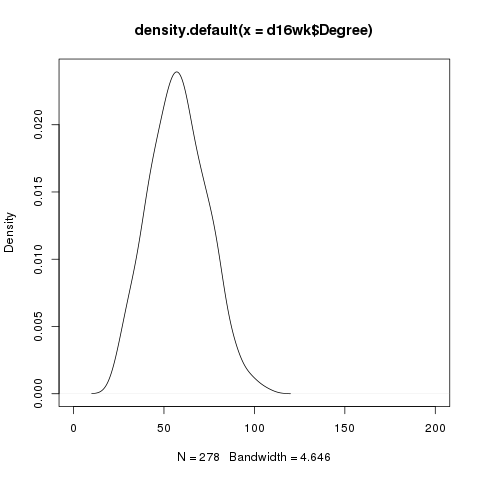

In [14]:
%%R
dp_6wk <- density(d6wk$Degree)
#plot(dp_6wk)
dp_ymt <- density(dymt$Degree)
#plot(dp_ymt, xlim=c(0,200))
dp_16wk <- density(d16wk$Degree)
plot(dp_16wk, xlim=c(0,200))

This is a possible way to go. However, there are nice graphic packages for python too.  
For instance, [Vincent](https://github.com/wrobstory/vincent/blob/master/README.md) is quite good.  
However, for now, Vincent does not install, so I will go with regular matplotlib

In [86]:
wk6 = [i for i in datarr[1:] if i[1] == 'YI']
wk16 = [i for i in datarr[1:] if i[1] == 'WT']
ymt = [i for i in datarr[1:] if i[1] == 'YM']
abx = [i for i in datarr[1:] if i[1] == 'ABX']
smt = [i for i in datarr[1:] if i[1] == 'SM']

In [87]:
from pylab import *
from scipy import *
import pylab as P

(0, 0.05)

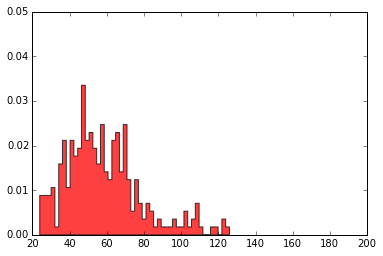

In [88]:
n, bins, patches = plt.hist([int(i[0]) for i in wk6], 50, normed=1, facecolor='r', alpha=0.75, histtype='stepfilled') 
plt.xlim(20,200)
plt.ylim(0,0.05)

(0, 0.05)

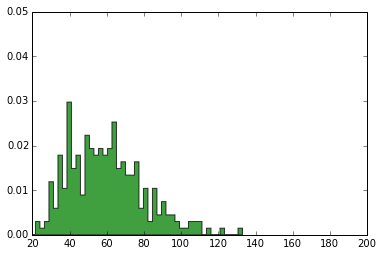

In [89]:
n, bins, patches = plt.hist([int(i[0]) for i in ymt], 50, normed=1, facecolor='g', alpha=0.75, histtype='stepfilled') 
plt.xlim(20,200)
plt.ylim(0,0.05)

(0, 0.05)

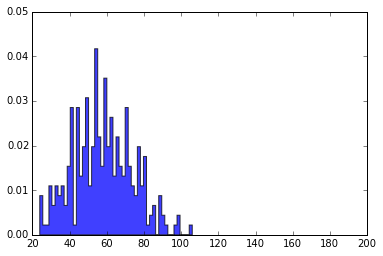

In [90]:
n, bins, patches = plt.hist([int(i[0]) for i in wk16], 50, normed=1, facecolor='b', alpha=0.75, histtype='stepfilled') 
plt.xlim(20,200)
plt.ylim(0,0.05)

(0, 0.05)

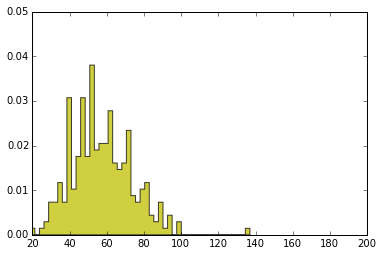

In [91]:
n, bins, patches = plt.hist([int(i[0]) for i in abx], 50, normed=1, facecolor='y', alpha=0.75, histtype='stepfilled') 
plt.xlim(20,200)
plt.ylim(0,0.05)

(0, 0.05)

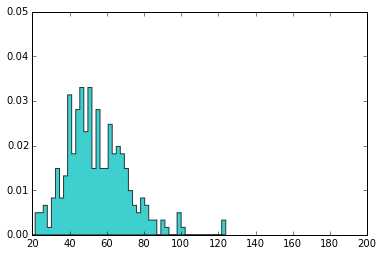

In [92]:
n, bins, patches = plt.hist([int(i[0]) for i in smt], 50, normed=1, facecolor='c',  alpha=0.75, histtype='stepfilled') 
plt.xlim(20,200)
plt.ylim(0,0.05)

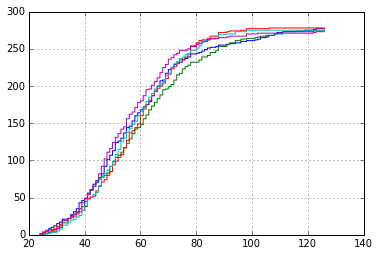

In [93]:
bins = sorted([int(i[0]) for i in wk6]) + [np.inf]

plt.figure()

n, bins, patches = plt.hist([int(i[0]) for i in wk6], normed=False, bins=bins, histtype='step', cumulative=True) 
n, bins, patches = plt.hist([int(i[0]) for i in ymt], normed=False, bins=bins, histtype='step', cumulative=True) 
n, bins, patches = plt.hist([int(i[0]) for i in wk16], normed=False, bins=bins, histtype='step', cumulative=True) 
n, bins, patches = plt.hist([int(i[0]) for i in abx], normed=False, bins=bins, histtype='step', cumulative=True) 
n, bins, patches = plt.hist([int(i[0]) for i in smt], normed=False, bins=bins, histtype='step', cumulative=True) 

P.grid(True)

**Below I use the python kernel density estimation ([KDE](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/)) method instead of normal density**

In [94]:
from scipy.stats import gaussian_kde
from scipy.stats.distributions import norm
import sklearn; print "  scikit-learn:", sklearn.__version__
import scipy; print "  scipy:", scipy.__version__
import statsmodels; print "  statsmodels:", statsmodels.__version__
from sklearn.neighbors import KernelDensity
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

  scikit-learn: 0.16.1
  scipy: 0.17.0
  statsmodels: 0.8.0.dev0+81be990


In [95]:
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(np.array([int(i[0]) for i in wk6])[:, None])
print grid.best_params_

{'bandwidth': 1.0}


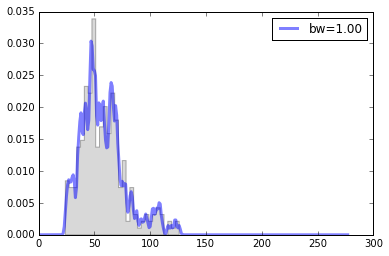

In [96]:
x_grid = np.array(range(len([int(i[0]) for i in wk6])))
x = np.array([int(i[0]) for i in wk6])

kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.legend(loc='upper right')
ax.set_xlim(0, 300);

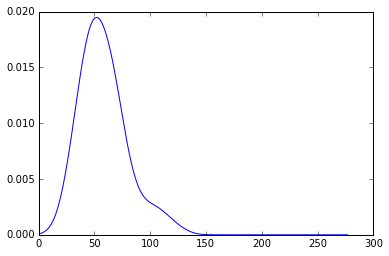

In [97]:
dens_wk6 = gaussian_kde([int(i[0]) for i in wk6])
dens_wk6.covariance_factor = lambda : 0.5
dens_wk6._compute_covariance()
xs = np.array(range(len([int(i[0]) for i in wk6])))
plt.plot(xs,dens_wk6(xs))
plt.show()

In [98]:
import pandas as pd

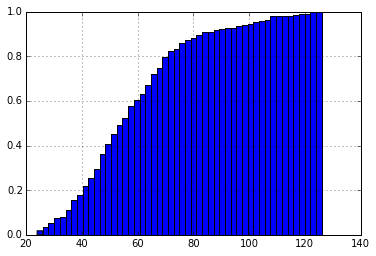

In [99]:
xSer = pd.Series(np.array([int(i[0]) for i in wk6]))
xSer.hist(cumulative=True, normed=1, bins=50)

Now I will try to fit a curve to the sample distribution using [this approach](http://glowingpython.blogspot.de/2012/07/distribution-fitting-with-scipy.html)

In [100]:
from scipy.stats import norm,rayleigh

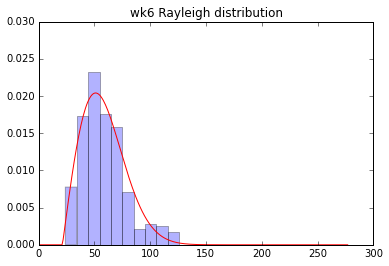

In [128]:
samp_wk6 = np.array([int(i[0]) for i in wk6])
param_wk6 = rayleigh.fit(samp_wk6) # distribution fitting
xs = np.array(range(len([int(i[0]) for i in wk6])))
pdf_fitted_wk6 = rayleigh.pdf(xs,loc=param_wk6[0],scale=param_wk6[1])

title('wk6 Rayleigh distribution')
plot(pdf_fitted_wk6,'r-')
hist(samp_wk6,normed=1,alpha=.3)
ylim((0,0.03))
show()

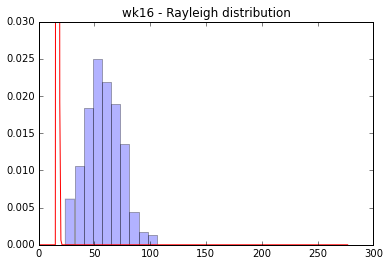

In [161]:
samp_wk16 = np.array([int(i[0]) for i in wk16])
param_wk16 = rayleigh.fit(samp_wk16) # distribution fitting
xs_wk16 = np.array(range(len([int(i[0]) for i in wk16])))
pdf_fitted_wk16 = rayleigh.pdf(xs_wk16,loc=param_wk16[0],scale=param_wk16[1])

title('wk16 - Rayleigh distribution')
plot(pdf_fitted_wk16,'r-')
hist(samp_wk16,normed=1,alpha=.3)
ylim((0,0.03))
show()

In [140]:
param_smt

(4.0999999999999996, 1.0)

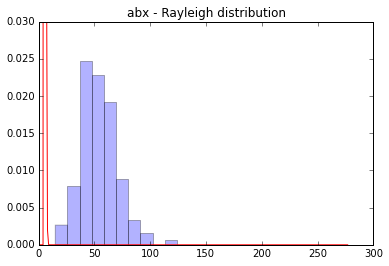

In [126]:
samp_smt = np.array([int(i[0]) for i in smt])
param_smt = rayleigh.fit(samp_smt) # distribution fitting
xs = np.array(range(len([int(i[0]) for i in smt])))
pdf_fitted_smt = rayleigh.pdf(xs,loc=param_smt[0],scale=param_smt[1])

title('abx - Rayleigh distribution')
plot(pdf_fitted_smt,'r-')
hist(samp_smt,normed=1,alpha=.3)
ylim((0,0.03))
show()

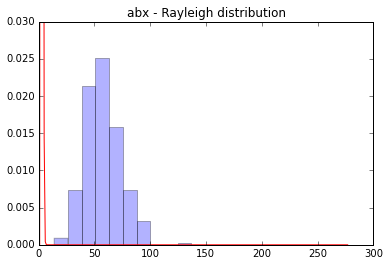

In [127]:
samp_abx = np.array([int(i[0]) for i in abx])
param_abx = rayleigh.fit(samp_abx) # distribution fitting
xs = np.array(range(len([int(i[0]) for i in abx])))
pdf_fitted_abx = rayleigh.pdf(xs,loc=param_abx[0],scale=param_abx[1])

title('abx - Rayleigh distribution')
plot(pdf_fitted_abx,'r-')
hist(samp_abx,normed=1,alpha=.3)
ylim((0,0.03))
show()

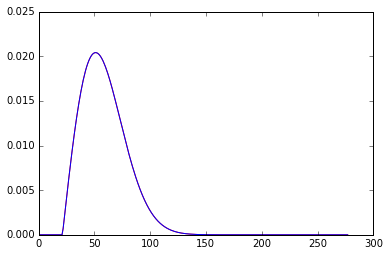

In [77]:
plot(pdf_fitted_wk6,'r-')
plot(pdf_fitted_wk16,'b-')

** Below the same analysis as above, on the updated, weighted files [2016-07-04] **

In [196]:
data2 = open('../data/DATA_genus_network_weighted_true.txt', 'rU').read()
datarr2 = np.array([i.split('\t') for i in data2.split('\n')[:-1]])

In [180]:
wk6_2 = [i for i in datarr2[1:] if i[1] == 'YI']
wk16_2 = [i for i in datarr2[1:] if i[1] == 'WT']
ymt_2 = [i for i in datarr2[1:] if i[1] == 'YM']
abx_2 = [i for i in datarr2[1:] if i[1] == 'ABX']
smt_2 = [i for i in datarr2[1:] if i[1] == 'SM']

(0, 0.2)

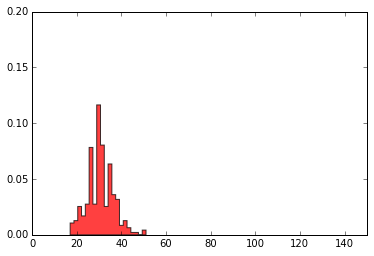

In [190]:
n, bins, patches = plt.hist([int(i[0]) for i in wk6_2], 20, normed=1, facecolor='r', alpha=0.75, histtype='stepfilled') 
plt.xlim(0,150)
plt.ylim(0,0.2)

(0, 0.2)

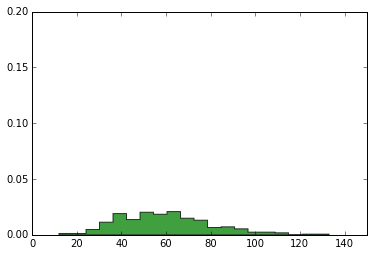

In [192]:
n, bins, patches = plt.hist([int(i[0]) for i in ymt], 20, normed=1, facecolor='g', alpha=0.75, histtype='stepfilled') 
plt.xlim(0,150)
plt.ylim(0,0.2)

(0, 0.2)

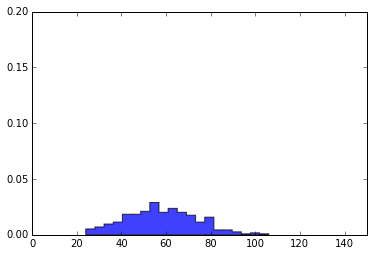

In [193]:
n, bins, patches = plt.hist([int(i[0]) for i in wk16], 20, normed=1, facecolor='b', alpha=0.75, histtype='stepfilled') 
plt.xlim(0,150)
plt.ylim(0,0.2)

(0, 0.2)

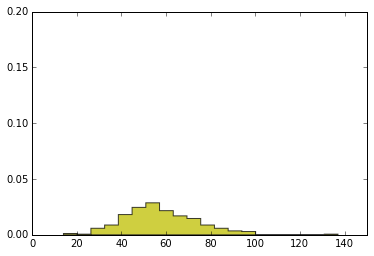

In [194]:
n, bins, patches = plt.hist([int(i[0]) for i in abx], 20, normed=1, facecolor='y', alpha=0.75, histtype='stepfilled') 
plt.xlim(0,150)
plt.ylim(0,0.2)

(0, 0.2)

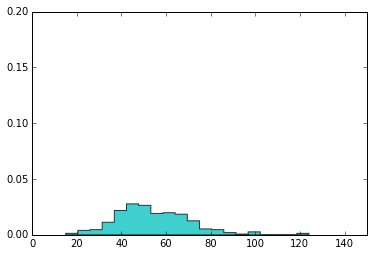

In [195]:
n, bins, patches = plt.hist([int(i[0]) for i in smt], 20, normed=1, facecolor='c', alpha=0.75, histtype='stepfilled') 
plt.xlim(0,150)
plt.ylim(0,0.2)